In [3]:
# !pip install contextily
import pandas as pd
from shapely.geometry import Point

In [4]:
stations_df = pd.read_csv('data/stations_with_conditions.csv')
landsat_df = pd.read_csv('data/train+LandsatAPI.csv')

In [5]:
def df_to_gdf(df):
    df["geometry"] = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
    return gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

In [6]:
stations_gdf = df_to_gdf(stations_df)
landsat_gdf = df_to_gdf(landsat_df)

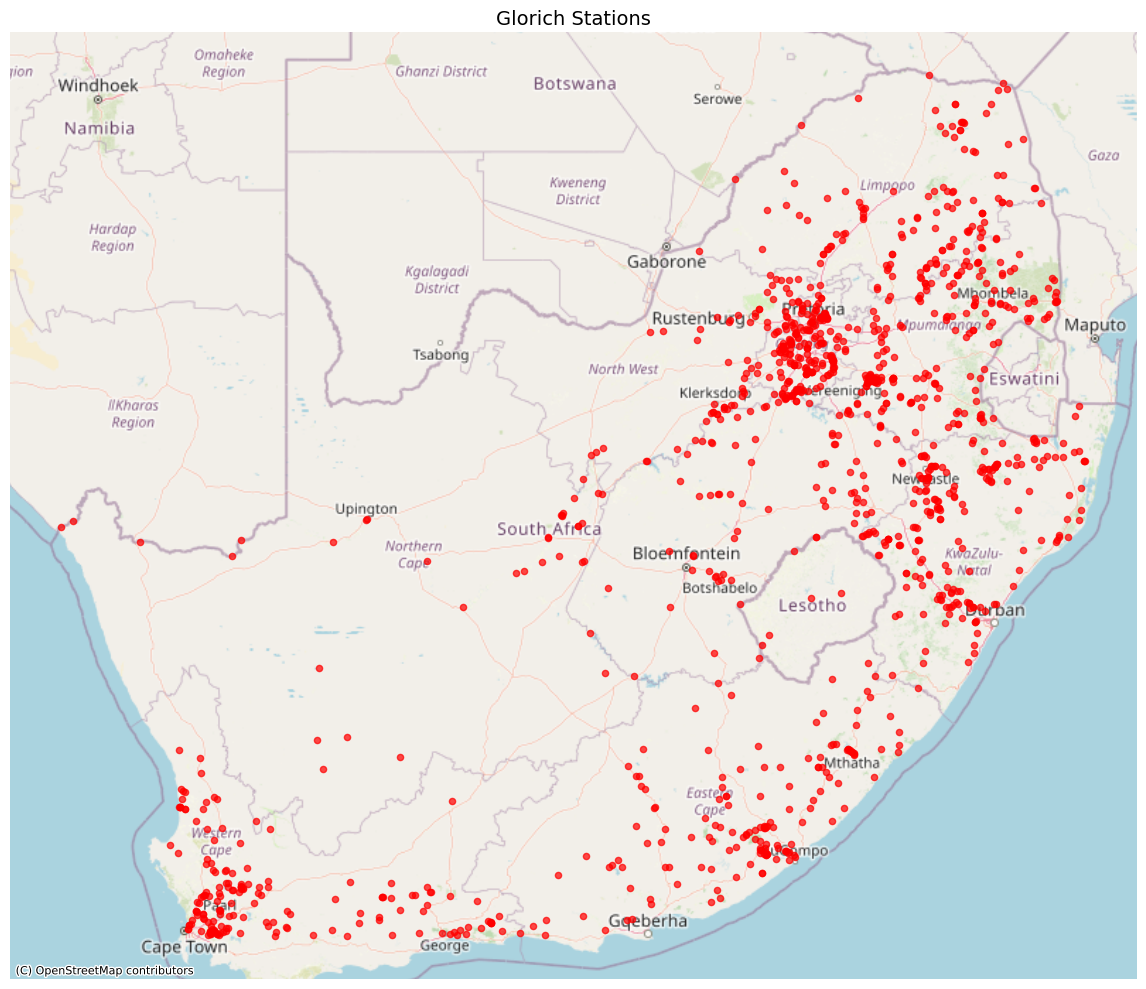

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # pip install contextily — adds a basemap


# ── Static plot with basemap ─────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 10))

stations_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    color='red',
    markersize=20,
    alpha=0.7,
    label='Stations'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Glorich Stations", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

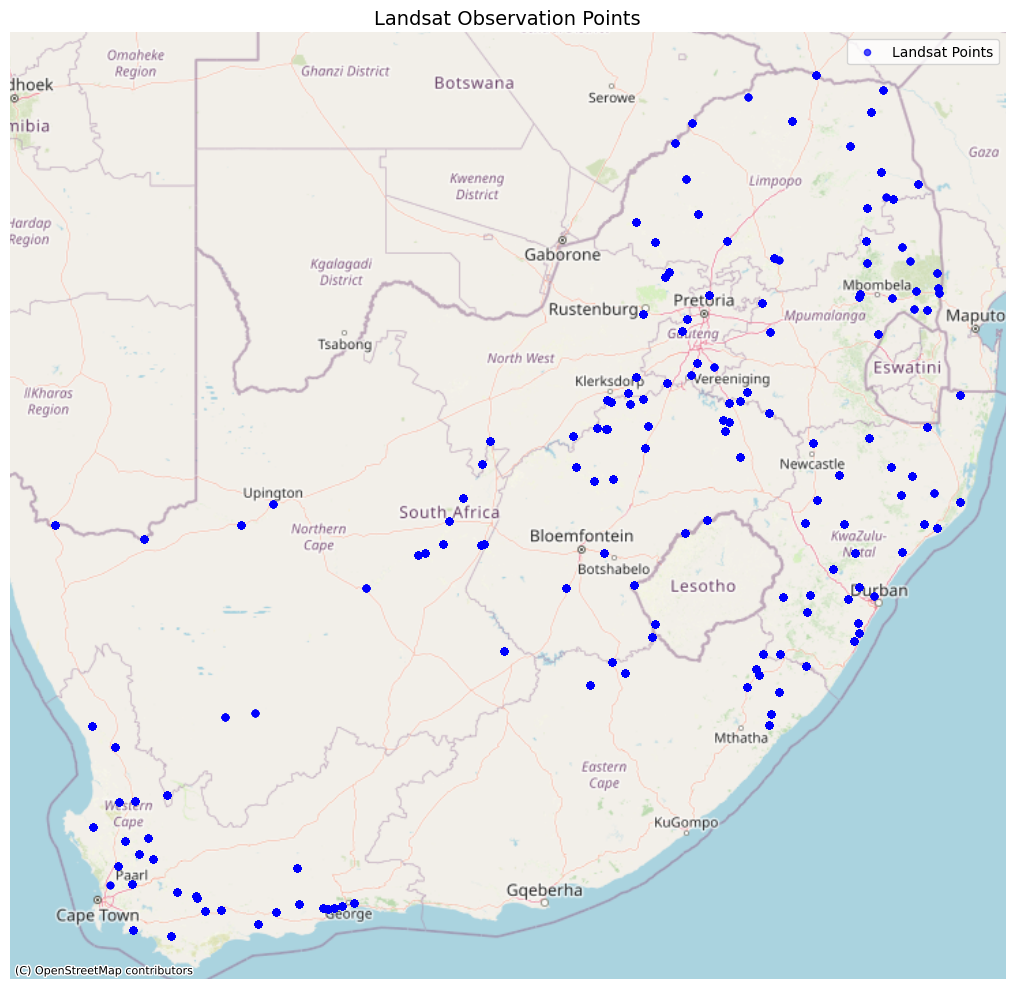

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))

landsat_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    color='blue',
    markersize=20,
    alpha=0.7,
    label='Landsat Points'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Landsat Observation Points", fontsize=14)
ax.set_axis_off()
plt.legend()
plt.tight_layout()
plt.show()